In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1. Veri Setini Yükleme
df = pd.read_csv('datafolder/verisetiekg.csv')

# 2. Eksik Verilerin Doldurulması veya Çıkarılması
# Eksik verileri ortalama ile doldurma (numeric) ve mod ile doldurma (categorical)
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

imputer_num = SimpleImputer(strategy='mean')  # Sayısal değişkenler için ortalama ile doldur
imputer_cat = SimpleImputer(strategy='most_frequent')  # Kategorik değişkenler için en sık görülen ile doldur

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])



# 3. Kategorik Değişkenlerin Sayısal Hale Getirilmesi (Encoding)
# Label Encoding (sınıflandırmada sıralı olmayan kategorik verileri sayısallaştırma)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Outlier (Aykırı Değer) Tespiti ve İşlenmesi
# Aykırı değerleri Z-Skoru ile tespit etme ve aykırı değerleri çıkarma
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Z-skoru 3'ten büyük olanları çıkar

# 5. Verinin Normalize Edilmesi veya Standartlaştırılması
# Normalizasyon (Min-Max Scaling) veya Standardizasyon (Z-Score Standartlaştırma)

# Min-Max Scaler (Normalizasyon)
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Eğer standartlaştırma (Z-skoru) yapmak isterseniz aşağıdaki satırı kullanabilirsiniz:
# scaler = StandardScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Veri Görselleştirmeleri
# Histogramlar
df.hist(figsize=(10, 10), bins=30)
plt.show()

# Scatter Plot (Numerik değişkenler için korelasyon analizi)
sns.pairplot(df[numeric_cols])
plt.show()

# Korelasyon Matrisi ve Isı Haritası
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 7. Yeni CSV Dosyasına Kaydetme
df.to_csv('temizverisetiekg.csv', index=False)


Temiz Veri Setini Yükleyelim

In [2]:
# Veri setini yükleme
file_path = "datafolder/temizverisetiekg.csv"  # Veri setinin yolu
df = pd.read_csv(file_path)

# Veri setinin genel bilgileri
print("Veri Seti Genel Bilgileri:")
print(df.info())


Veri Seti Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144037 entries, 0 to 144036
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          144037 non-null  int64  
 1   type            144037 non-null  int64  
 2   0_pre-RR        144037 non-null  float64
 3   0_post-RR       144037 non-null  float64
 4   0_pPeak         144037 non-null  float64
 5   0_tPeak         144037 non-null  float64
 6   0_rPeak         144037 non-null  float64
 7   0_sPeak         144037 non-null  float64
 8   0_qPeak         144037 non-null  float64
 9   0_qrs_interval  144037 non-null  float64
 10  0_pq_interval   144037 non-null  float64
 11  0_qt_interval   144037 non-null  float64
 12  0_st_interval   144037 non-null  float64
 13  0_qrs_morph0    144037 non-null  float64
 14  0_qrs_morph1    144037 non-null  float64
 15  0_qrs_morph2    144037 non-null  float64
 16  0_qrs_morph3    144037 non-nu

In [3]:
# Eksik verileri doldurma
df_cleaned = df.copy()

# Sayısal sütunlar için ortalama ile doldurma
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Kategorik sütunlar için mod ile doldurma
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Eksik verilerin kontrolü
print("\nEksik veriler dolduruldu:")
print(df_cleaned.isnull().sum())



Eksik veriler dolduruldu:
record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64


In [4]:
# MinMaxScaler ile normalize etme
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [5]:
# Label Encoding
label_encoders = {}
df_encoded = df_normalized.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_normalized[col])
    label_encoders[col] = le

print("\nKategorik değişkenler sayısal hale getirildi.")



Kategorik değişkenler sayısal hale getirildi.


In [6]:
from sklearn.ensemble import IsolationForest

# Isolation Forest kullanarak anomali tespiti
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_encoded['anomaly'] = iso_forest.fit_predict(df_encoded[numeric_columns])

# Anomaliler için etiketleme (0 = Anomaly, 1 = Normal)
df_encoded['anomaly'] = df_encoded['anomaly'].map({1: 1, -1: 0})

# Anomali sayıları
print("\nAnomali ve normal değerlerin sayıları:")
print(df_encoded['anomaly'].value_counts())



Anomali ve normal değerlerin sayıları:
anomaly
1    136835
0      7202
Name: count, dtype: int64


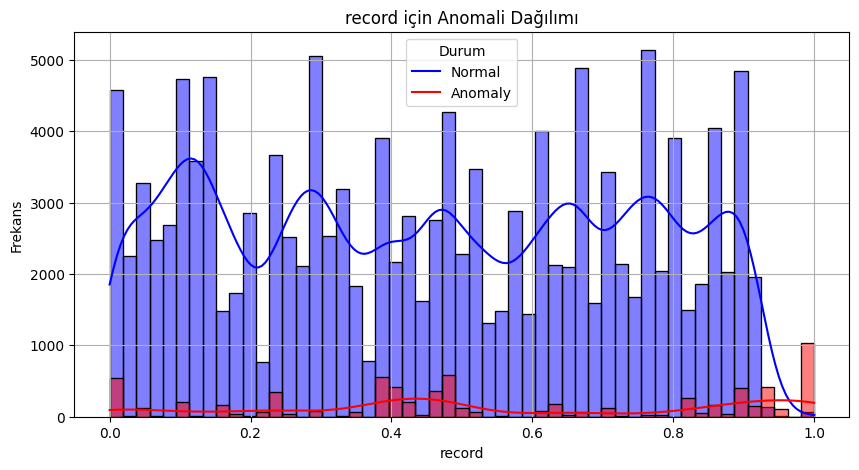

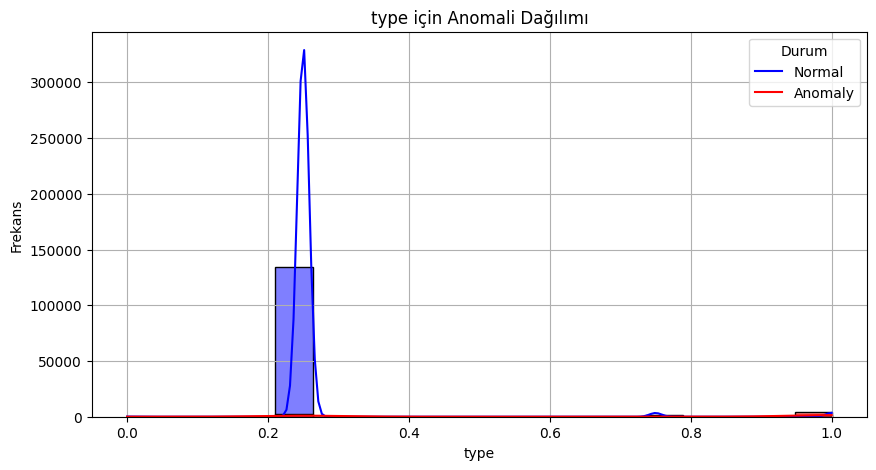

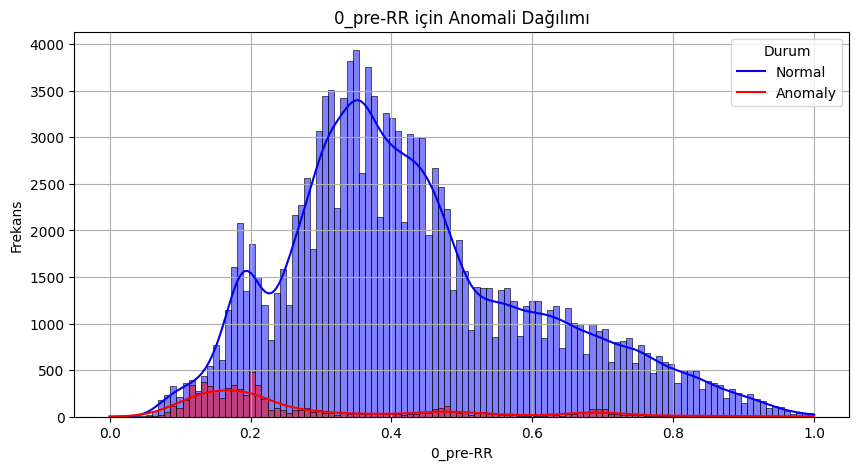

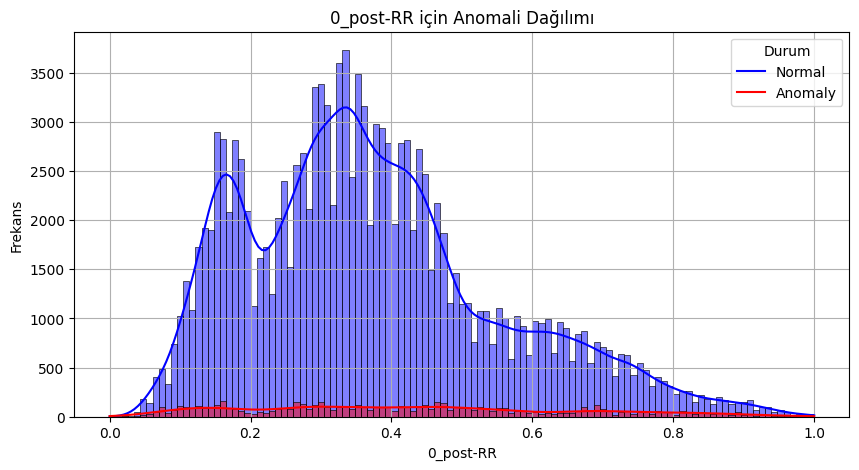

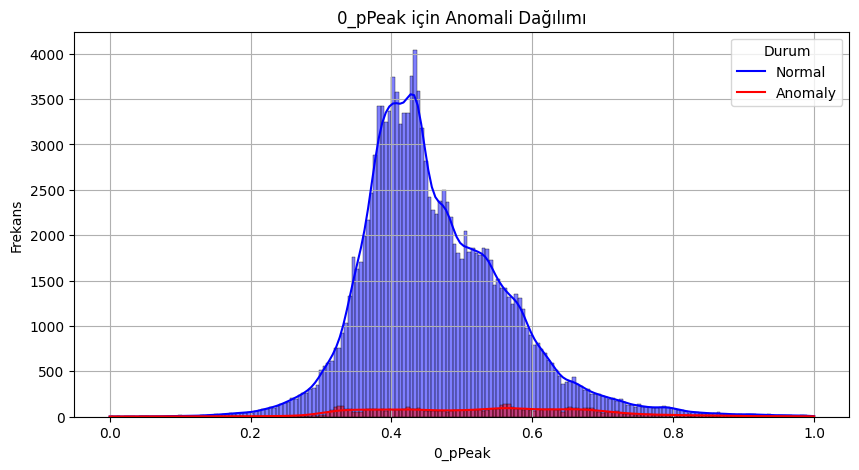

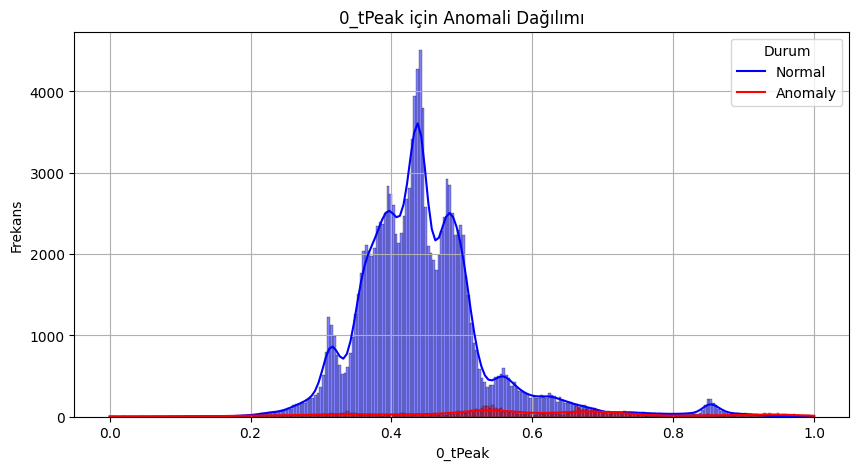

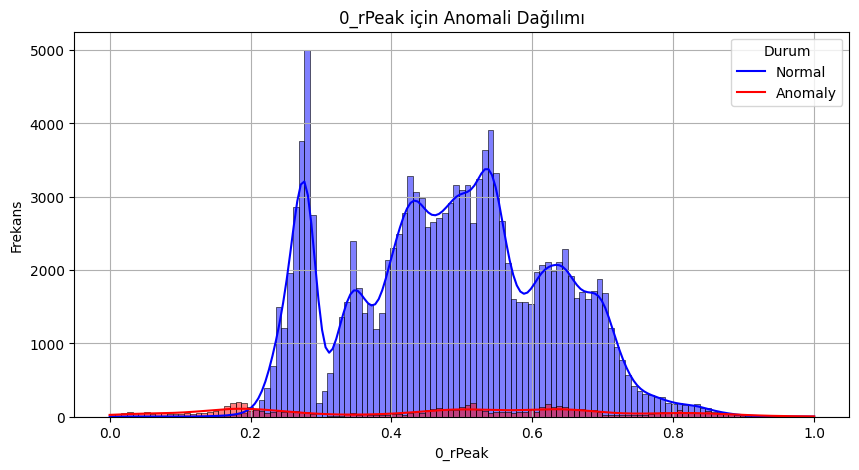

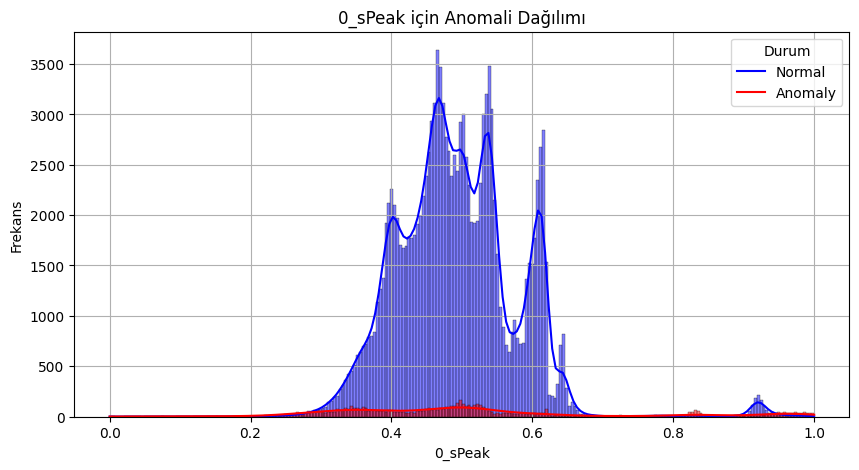

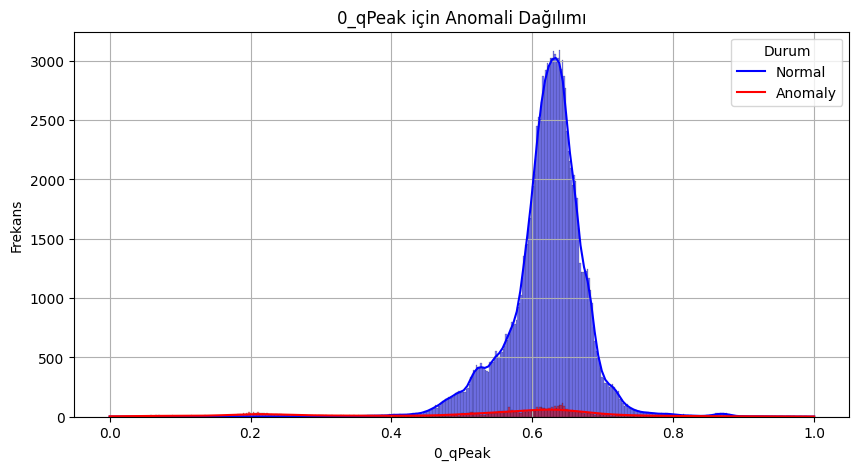

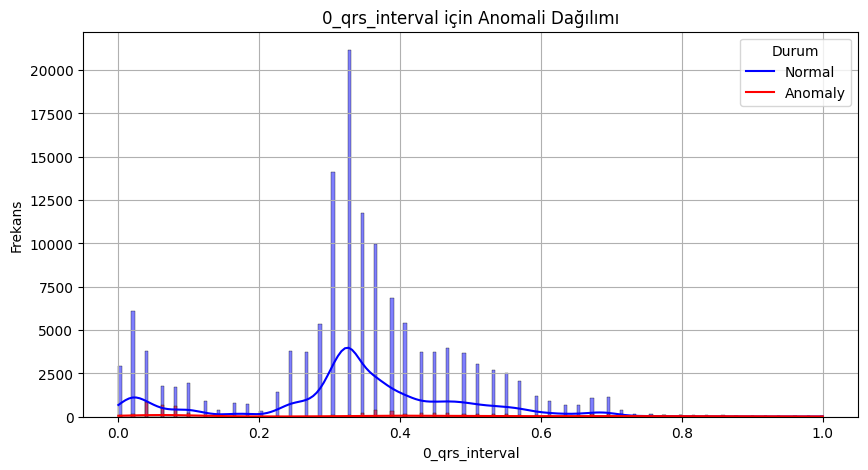

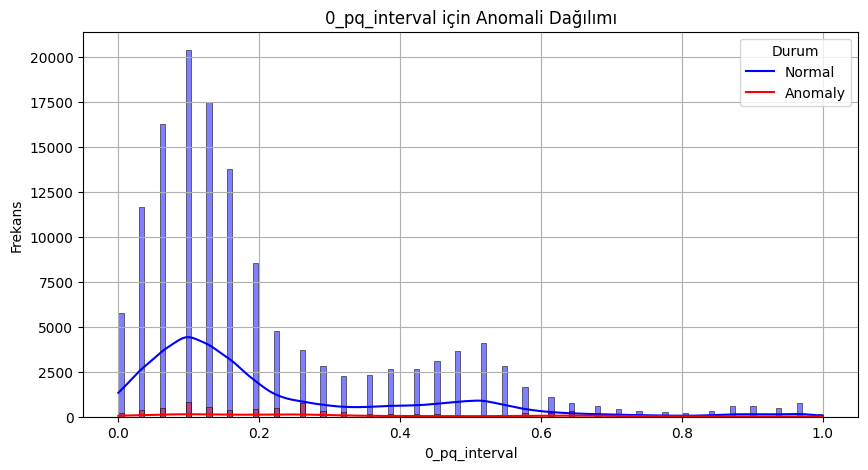

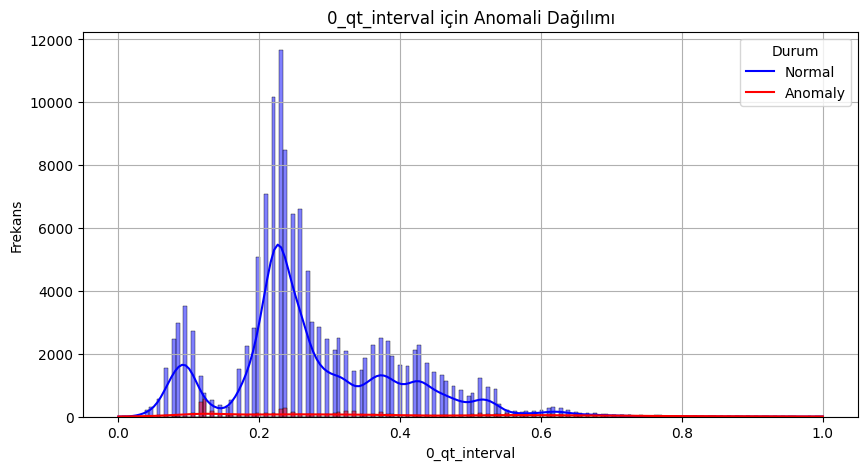

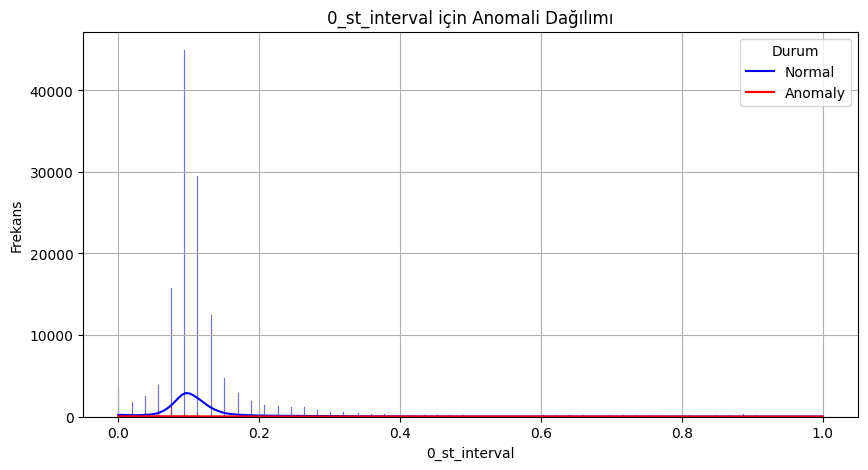

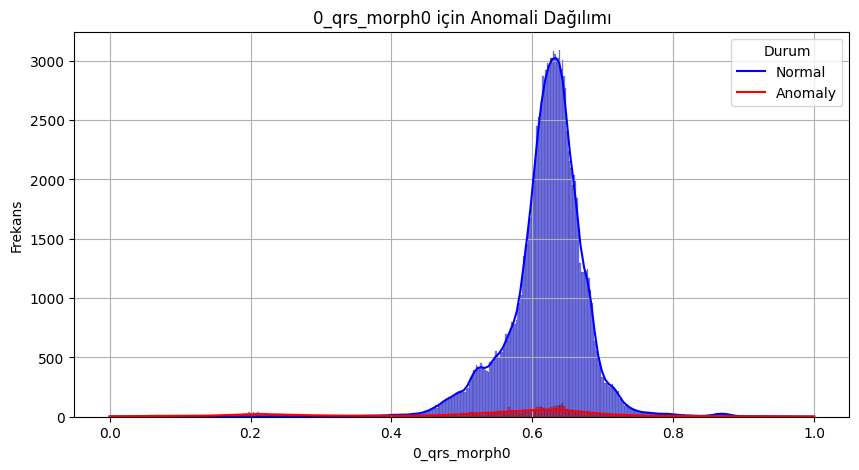

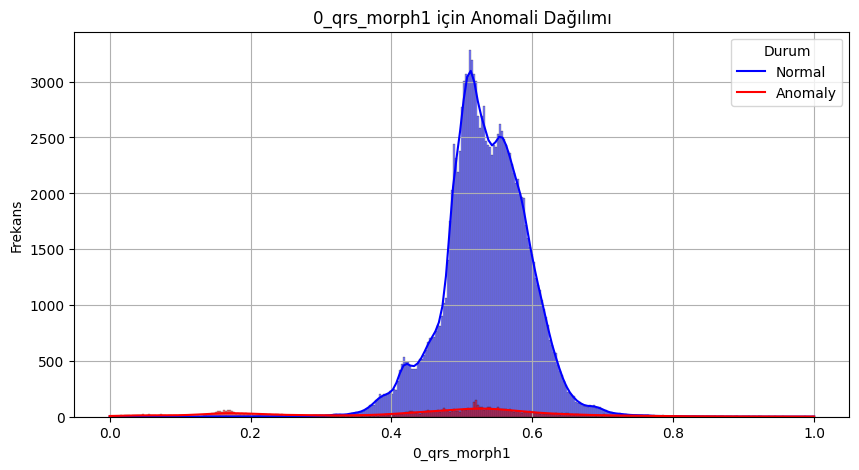

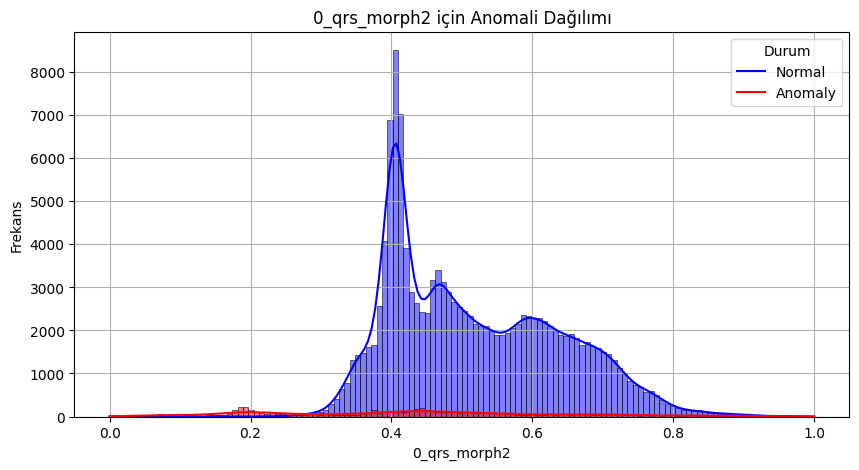

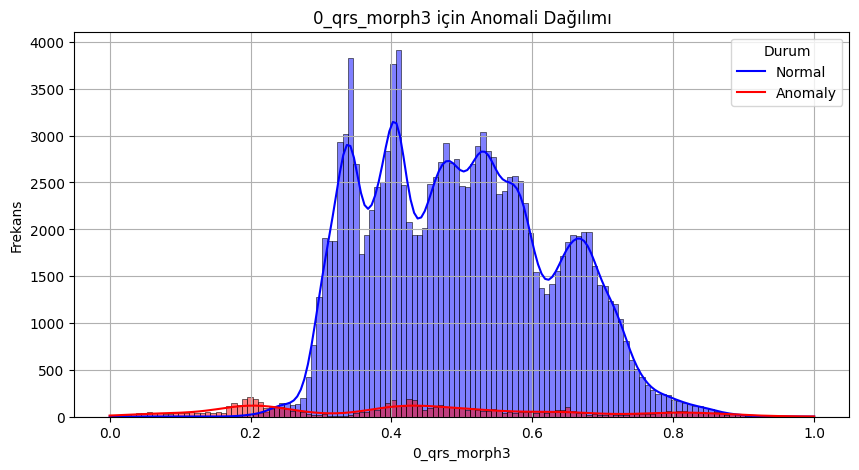

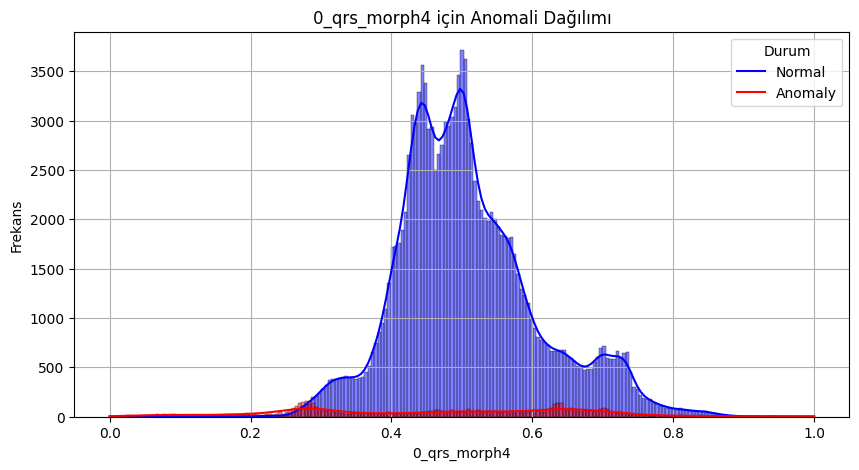

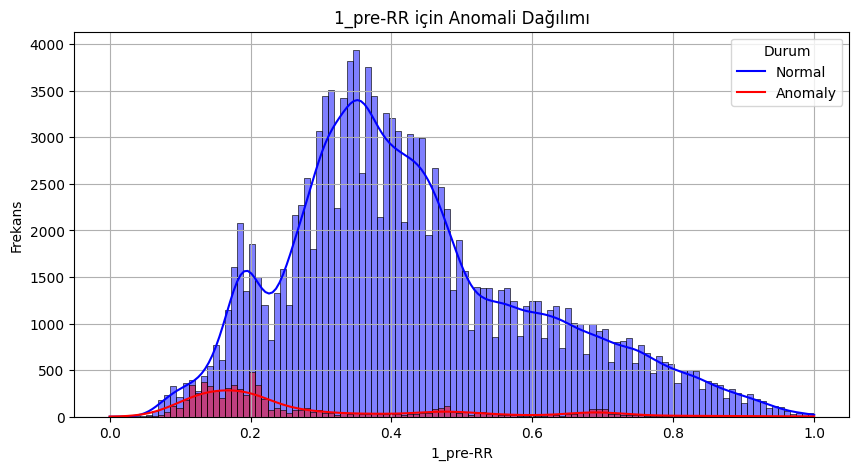

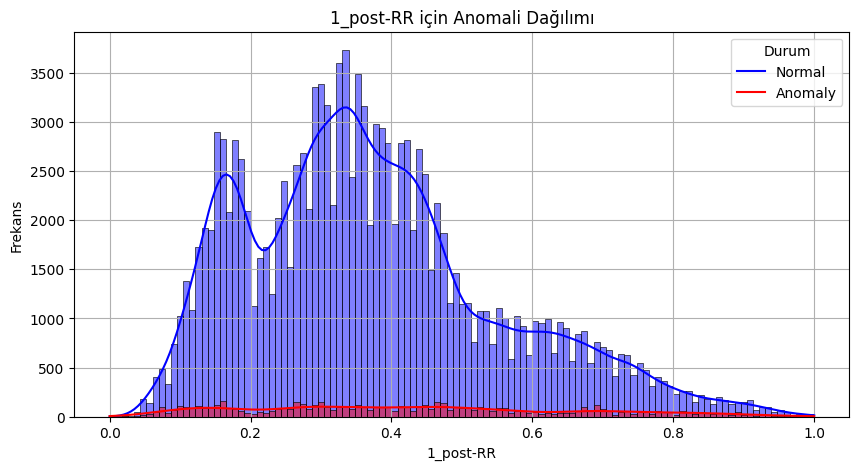

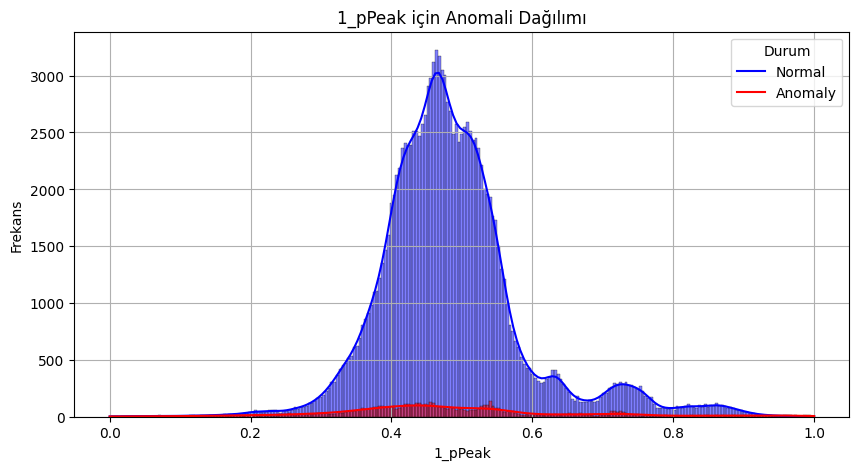

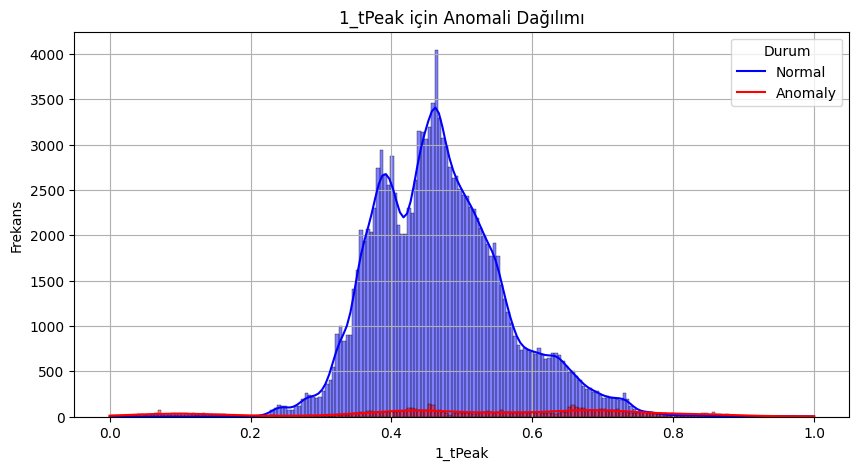

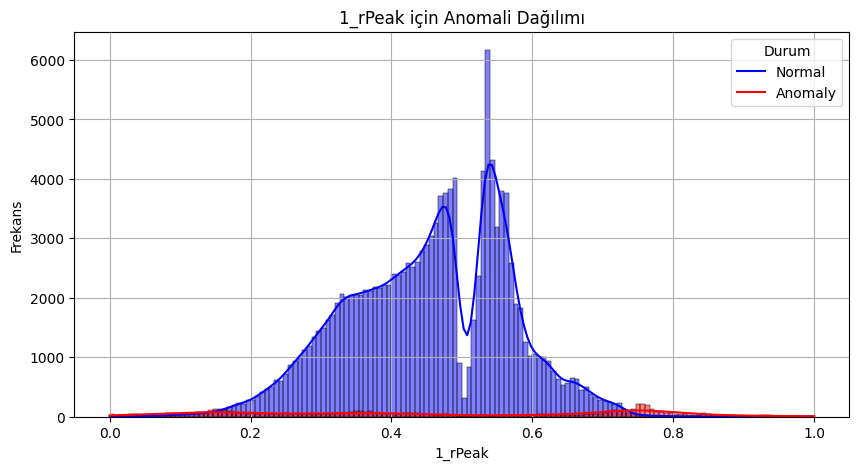

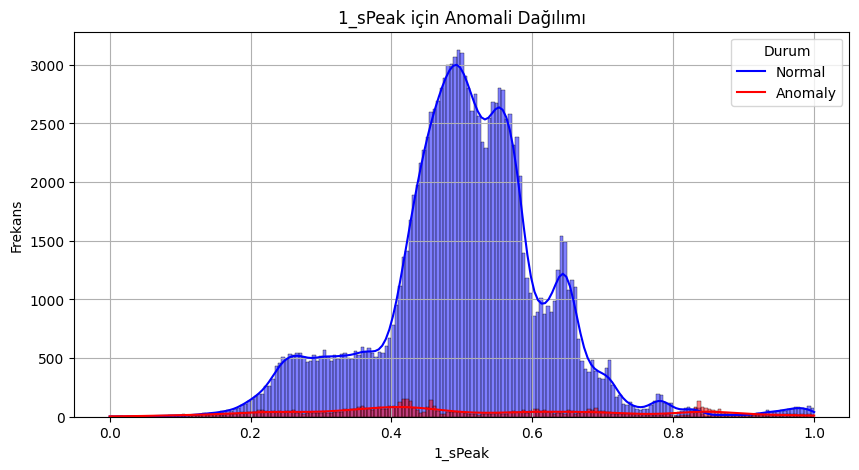

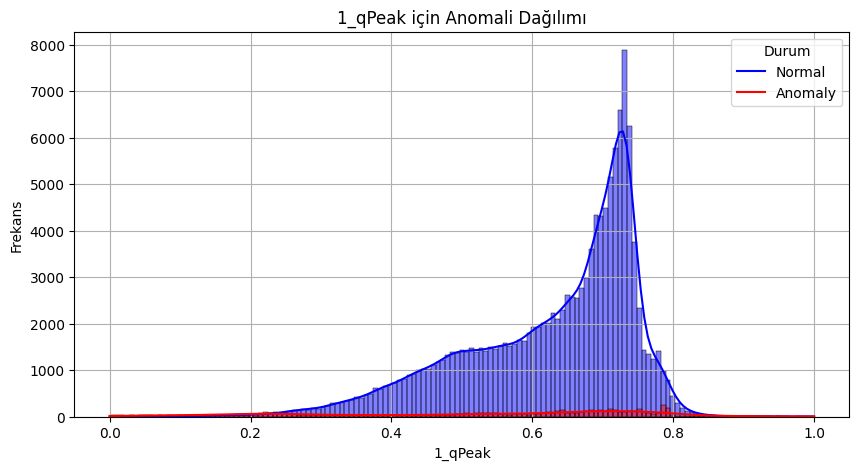

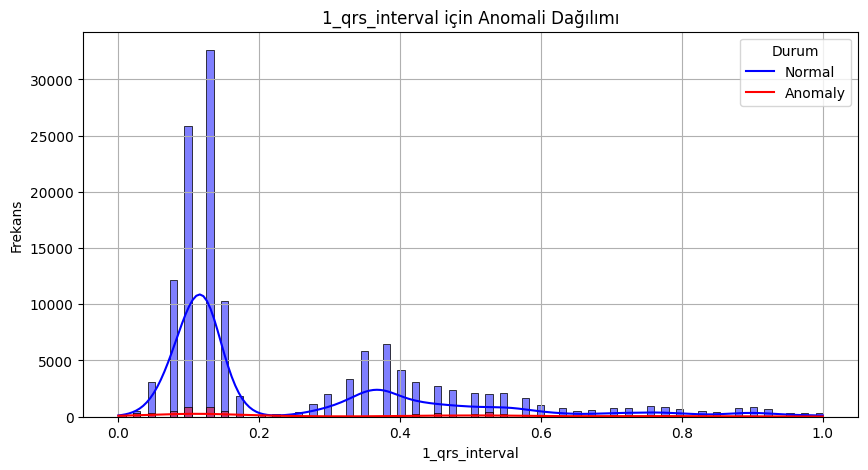

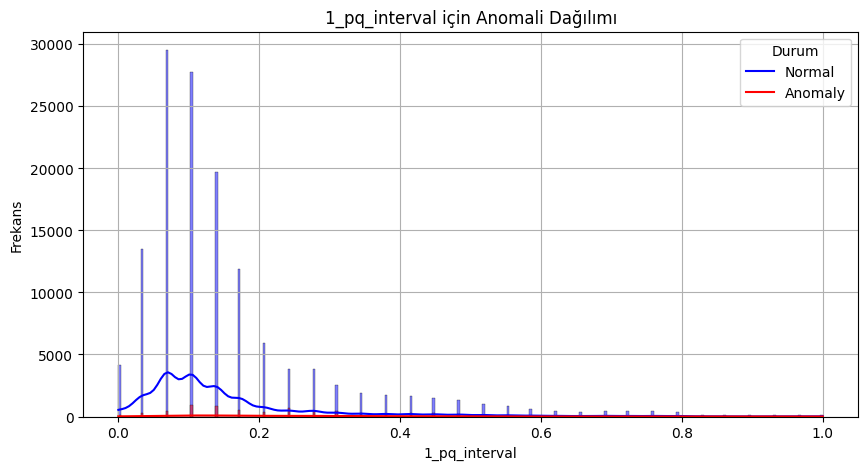

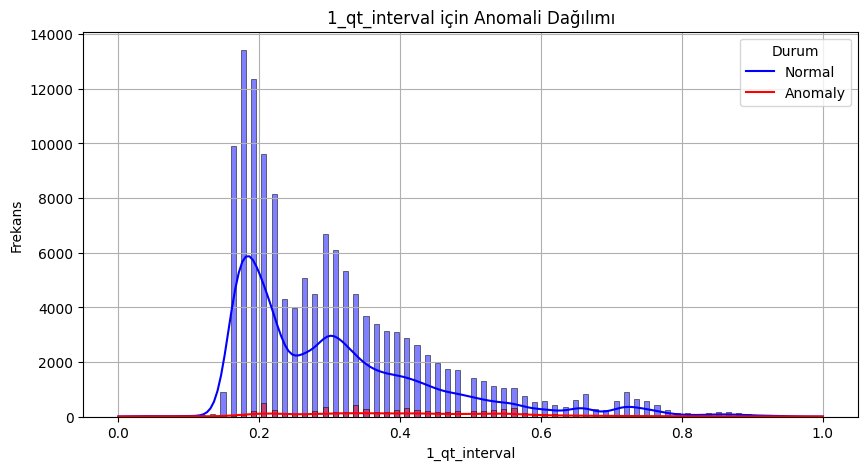

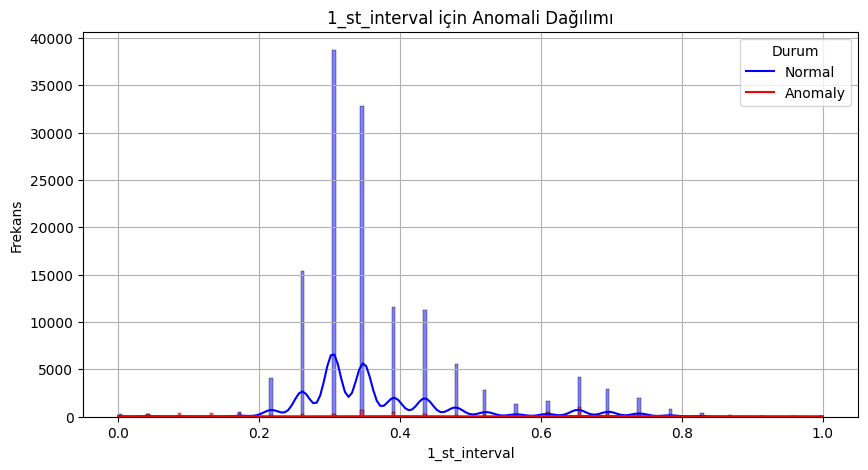

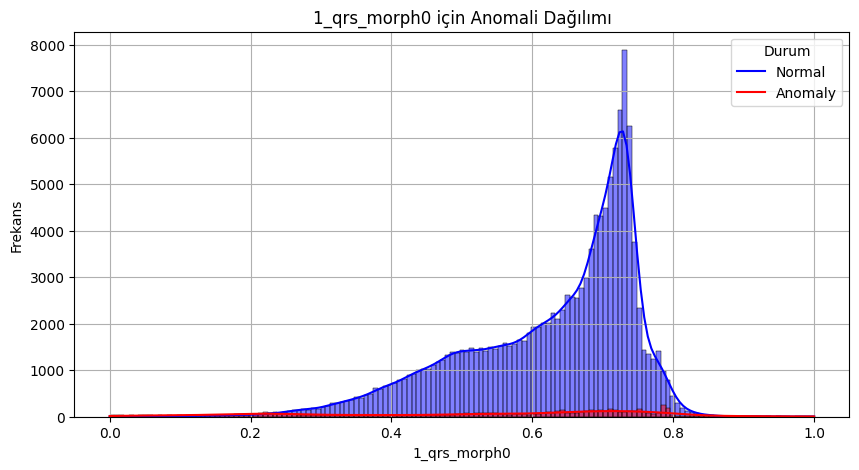

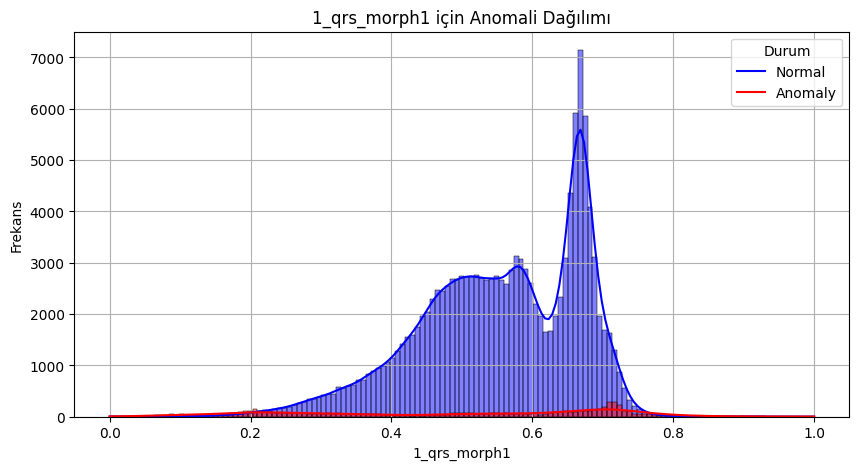

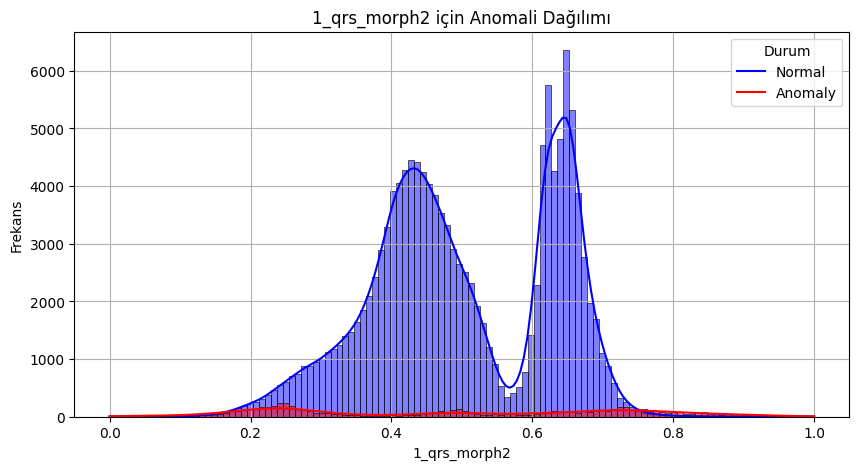

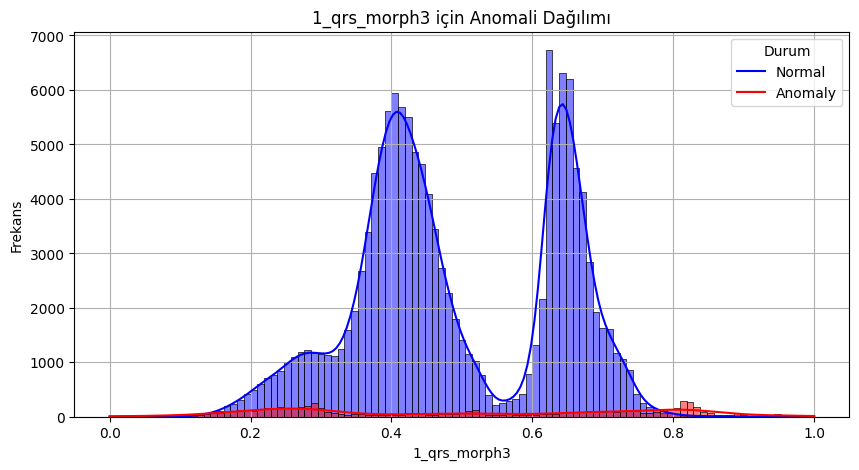

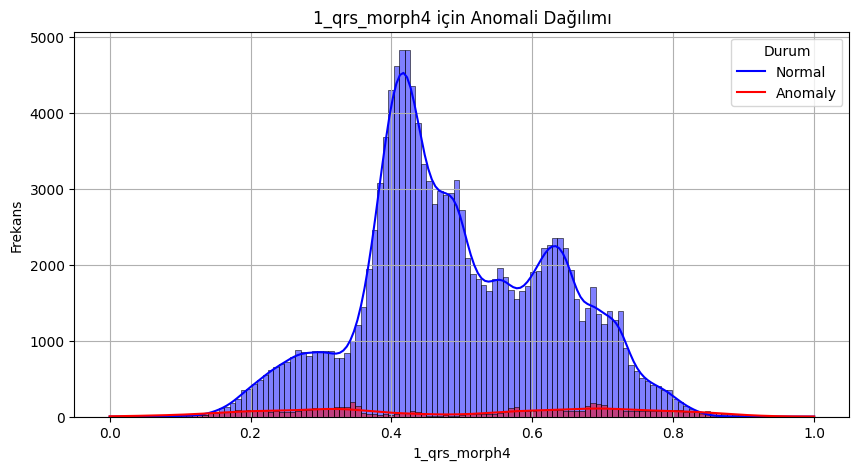

In [7]:
# Anomalileri görselleştirme
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_encoded, x=column, hue='anomaly', kde=True, palette={1: 'blue', 0: 'red'})
    plt.title(f"{column} için Anomali Dağılımı")
    plt.xlabel(column)
    plt.ylabel("Frekans")
    plt.legend(title='Durum', labels=['Normal', 'Anomaly'])
    plt.grid(True)
    plt.show()


In [8]:
# İşlenmiş veriyi kaydetme
df_encoded.to_csv("datafolder/anomalytagliveriseti.csv", index=False)
print("\nİşlenmiş veri seti kaydedildi: datafolder/anomalytagliveriseti.csv")



İşlenmiş veri seti kaydedildi: datafolder/anomalytagliveriseti.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [12]:
# Veri setini yükleme
import torch


file_path = "datafolder/anomalytagliveriseti.csv"  # İşlenmiş CSV dosyası
df = pd.read_csv(file_path)

# Veri setinin genel bilgileri
print("Veri Seti Genel Bilgileri:")
print(df.info())

# Kategorik değişkenlerin encoding işlemi
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Özellik-hedef ayrımı: 'anomaly' hedef değişken olarak kullanılıyor
X = df.drop(columns=['anomaly'])  # 'anomaly' sütunu dışında kalan tüm sütunlar
y = df['anomaly']  # 'anomaly' hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özelliklerin standardize edilmesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tensor dönüşümü
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


Veri Seti Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144037 entries, 0 to 144036
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          144037 non-null  float64
 1   type            144037 non-null  float64
 2   0_pre-RR        144037 non-null  float64
 3   0_post-RR       144037 non-null  float64
 4   0_pPeak         144037 non-null  float64
 5   0_tPeak         144037 non-null  float64
 6   0_rPeak         144037 non-null  float64
 7   0_sPeak         144037 non-null  float64
 8   0_qPeak         144037 non-null  float64
 9   0_qrs_interval  144037 non-null  float64
 10  0_pq_interval   144037 non-null  float64
 11  0_qt_interval   144037 non-null  float64
 12  0_st_interval   144037 non-null  float64
 13  0_qrs_morph0    144037 non-null  float64
 14  0_qrs_morph1    144037 non-null  float64
 15  0_qrs_morph2    144037 non-null  float64
 16  0_qrs_morph3    144037 non-nu

In [13]:
# DataLoader oluşturma
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [14]:
# Model tanımı
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

# Modelin örneklenmesi
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)
print(model)


NeuralNetwork(
  (layer1): Linear(in_features=34, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)


In [15]:
# Kayıp fonksiyonu ve optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim
epochs = 20
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    
    # Doğrulama
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    
    val_losses.append(val_loss / len(test_loader))
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")


Epoch 1/20, Training Loss: 0.0474, Validation Loss: 0.0280
Epoch 2/20, Training Loss: 0.0292, Validation Loss: 0.0252
Epoch 3/20, Training Loss: 0.0260, Validation Loss: 0.0231
Epoch 4/20, Training Loss: 0.0250, Validation Loss: 0.0223
Epoch 5/20, Training Loss: 0.0241, Validation Loss: 0.0219
Epoch 6/20, Training Loss: 0.0222, Validation Loss: 0.0206
Epoch 7/20, Training Loss: 0.0222, Validation Loss: 0.0220
Epoch 8/20, Training Loss: 0.0214, Validation Loss: 0.0196
Epoch 9/20, Training Loss: 0.0213, Validation Loss: 0.0211
Epoch 10/20, Training Loss: 0.0205, Validation Loss: 0.0219
Epoch 11/20, Training Loss: 0.0204, Validation Loss: 0.0199
Epoch 12/20, Training Loss: 0.0200, Validation Loss: 0.0197
Epoch 13/20, Training Loss: 0.0194, Validation Loss: 0.0243
Epoch 14/20, Training Loss: 0.0198, Validation Loss: 0.0228
Epoch 15/20, Training Loss: 0.0190, Validation Loss: 0.0206
Epoch 16/20, Training Loss: 0.0200, Validation Loss: 0.0189
Epoch 17/20, Training Loss: 0.0186, Validation Lo

In [ ]:
# Eğitim ve doğrulama kayıplarının grafiği
plt.plot(train_losses, label='Eğitim Kaybı')
plt.plot(val_losses, label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Test setinde tahminler
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = (y_pred > 0.5).float()

# Performans metrikleri
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()


Makina Öğrenmesi Kısmı

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Veriyi yükle
df = pd.read_csv("datafolder/anomalytagliveriseti.csv")

# Eksik verileri doldur
# Sayısal sütunlarda ortalama ile doldurma
df.fillna(df.mean(), inplace=True)

# Kategorik sütunlar için en yaygın değeri kullanarak doldurma
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Kategorik verileri sayısal hale getirme (Label Encoding)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Hedef değişkeni belirleme (anomaly sütunu)
# Eğer anomaly sütunu 0 ve 1 değerleri taşıyorsa, onu hedef olarak alabiliriz
X = df.drop('anomaly', axis=1)  # Özellikler (X)
y = df['anomaly']  # Hedef değişken (y)

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini kurma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Model performansını değerlendirme
print("Model Doğruluğu:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance (Özelliklerin Önem Dereceleri)
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

print("\nÖzelliklerin Önem Dereceleri:")
print(feature_importances)


Model Doğruluğu: 0.9940294362677035

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1456
           1       1.00      1.00      1.00     27352

    accuracy                           0.99     28808
   macro avg       0.97      0.96      0.97     28808
weighted avg       0.99      0.99      0.99     28808


Özelliklerin Önem Dereceleri:
                Importance
type              0.185722
0_qrs_morph2      0.065791
1_rPeak           0.055548
0_qrs_morph3      0.049375
1_qrs_morph1      0.039075
1_qPeak           0.038458
1_tPeak           0.036331
0_qt_interval     0.032613
record            0.031878
1_qrs_morph2      0.031776
0_qPeak           0.030794
0_qrs_morph1      0.030775
0_rPeak           0.030029
0_qrs_morph0      0.029950
0_tPeak           0.027849
1_qrs_morph3      0.025553
0_sPeak           0.025262
1_qrs_morph0      0.024022
0_qrs_interval    0.021099
0_st_interval     0.020465
1_pre-RR      